

---



---


# **KLASIFIKASI PENYAKIT PCOS MENGGUNAKAN SMOTE DAN ALOGARITMA RANDOM FOREST.**



---



---


Nama : Luthfia Ridho Damayanti

NIM  : 21.11.4185

## PERSIAPAN DATA

### Import Library

In [23]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

### Input Dataset

In [24]:
# Import dataset
file_path = '/content/drive/MyDrive/SKRIPSI/ml/PCOS_data_without_infertility (1).xlsx'
df = pd.read_excel(file_path, sheet_name='Full_new', header=0)

### Melihat Dataset

In [25]:
# Preview dataset
print(f"Jumlah sampel: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1] - 1}")
print("\nPreview dataset:")
print(df.head())

Jumlah sampel: 541
Jumlah fitur: 44

Preview dataset:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N) 

## EXPLORATORY DATA ANALYSIS


### 1. Informasi Dataset

In [26]:
# Tampilkan Informasi Data
print("=== Info Data ===")
print(df.info())

=== Info Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           

In [27]:
# Informasi statistik dataset
print("\nInformasi statistik dataset:")
print(df.describe())


Informasi statistik dataset:
           Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.311285    13.802218         73.247689   
std       6.033545    4.056399     1.840812          4.430285   
min     137.000000   12.4

### 2. Distribusi Dataset pada Kolom Target (PCOS (Y/N))

In [28]:
# Cek distribusi kelas pada kolom 'PCOS (Y/N)'
print("Distribusi kelas target:")
print(df['PCOS (Y/N)'].value_counts())

# Persentase kelas 1 (Penderita PCOS)
print(f"Persentase kelas 1 (Penderita PCOS): {df['PCOS (Y/N)'].mean() * 100:.2f}%")

# Persentase kelas 0 (Tidak menderita PCOS)
print(f"Persentase kelas 0 (Tidak menderita PCOS): {(1 - df['PCOS (Y/N)'].mean()) * 100:.2f}%")

Distribusi kelas target:
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64
Persentase kelas 1 (Penderita PCOS): 32.72%
Persentase kelas 0 (Tidak menderita PCOS): 67.28%


<function matplotlib.pyplot.show(close=None, block=None)>

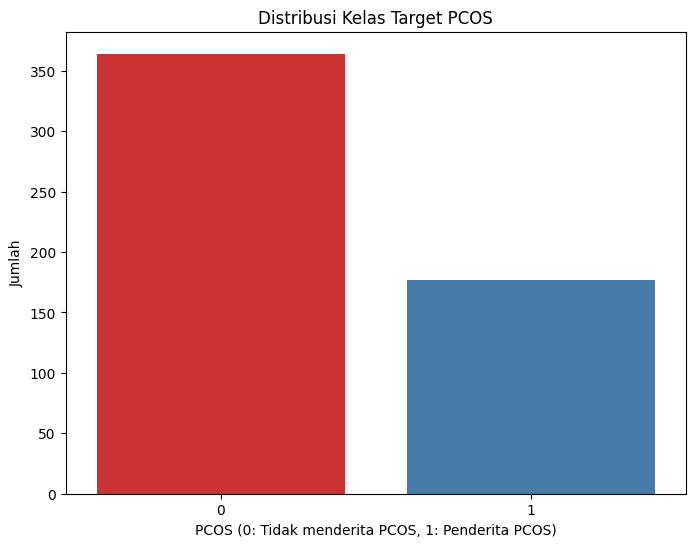

In [29]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='PCOS (Y/N)', data=df, palette='Set1')
plt.title('Distribusi Kelas Target PCOS')
plt.xlabel('PCOS (0: Tidak menderita PCOS, 1: Penderita PCOS)')
plt.ylabel('Jumlah')
plt.show

### 3. Korelasi Fitur

In [30]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

In [31]:
# Korelasi terhadap target
corr_with_target = numerical_df.corr()['PCOS (Y/N)'].drop('PCOS (Y/N)').sort_values(ascending=False)

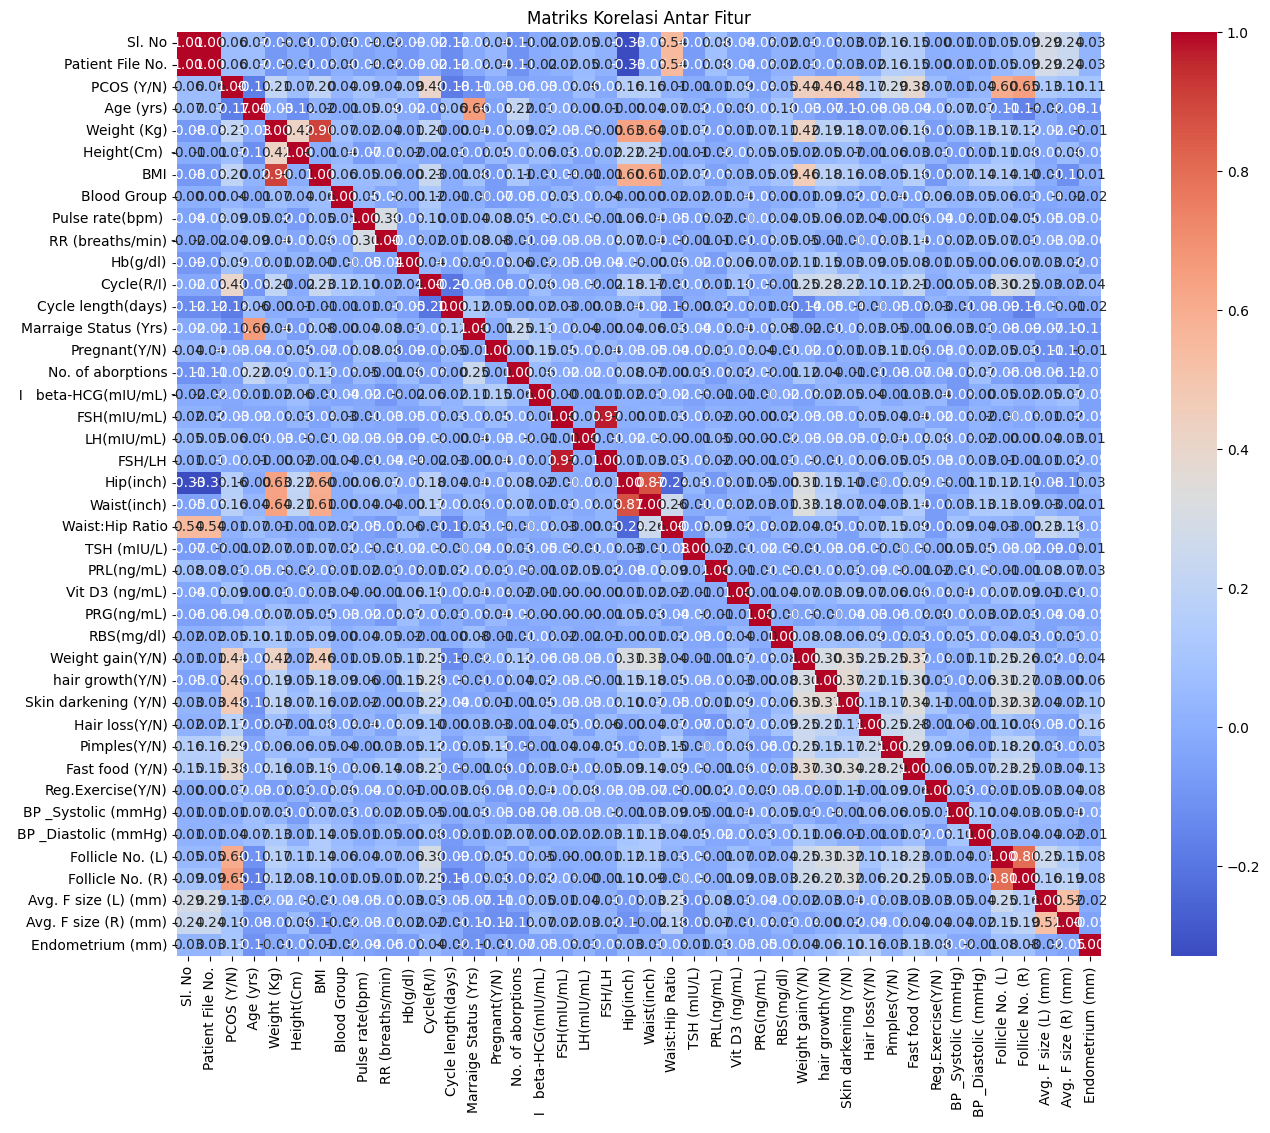

In [32]:
# Visualisasi korelasi fitur
plt.figure(figsize=(18, 12))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

In [33]:
# Cek Korelasi Fitur dengan Target
print("\nKorelasi fitur dengan target:")
print(correlation_matrix['PCOS (Y/N)'].sort_values(ascending=False))


Korelasi fitur dengan target:
PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)        

### 4. Cek Missing Value

In [34]:
# Cek nilai yang hilang
print("\nCek nilai yang hilang:")
print(df.isnull().sum())


Cek nilai yang hilang:
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (

## PREPROCESSING DATA





### Data Cleanning




In [35]:
# Mengatasi missing value pada kolom Marriage Status dengan median
df['Marraige Status (Yrs)'] = df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median())

In [36]:
# Imputasi missing value dengan median untuk kolom fast food
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median())

In [37]:
# Hapus kolom SI. No
df = df.drop(columns=['Unnamed: 44'])

In [38]:
# Cek missing value setelah diproses
print("\nMissing value setelah imputasi:")
print(df.isnull().sum())


Missing value setelah imputasi:
Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)   

In [39]:
# Identifikasi kolom
target_col = 'PCOS (Y/N)'  # ganti dengan nama kolom target sebenarnya
num_cols = df.drop(columns=target_col).columns.tolist()

# Membersihkan nilai numerik (hapus titik/koma yang ganggu)
for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'\.$', '', regex=True)      # hapus titik di akhir
        .str.replace(',', '.', regex=False)       # ganti koma jadi titik
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')  # konversi ke float


In [40]:
# Membatasi angka desimal menjadi 2 digit di semua kolom numerik
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].round(2)

In [41]:
# Memersihkan kolom numerik yang salah format
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        try:
            # Bersihkan data: mengganti koma dengan titik, hapus karakter non-numerik
            df_clean[col] = df_clean[col].str.replace(',', '.')
            df_clean[col] = df_clean[col].str.replace('[^0-9.-]', '', regex=True)
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        except:
            pass  # Abaikan kolom yang memang bukan numerik

### Split Data

In [42]:
# Memisahkan fitur dan target
X = df.drop(columns=['PCOS (Y/N)'])  # Fitur (semua kolom kecuali target)
y = df['PCOS (Y/N)']                 # Target

# Menampilkan bentuk data
print("Shape X (fitur):", X.shape)
print("Shape y (target):", y.shape)

Shape X (fitur): (541, 43)
Shape y (target): (541,)


### Train-Test Split

In [43]:
# Membagi data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Menampilkan bentuk data hasil split
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (432, 43)
Ukuran X_test: (109, 43)
Ukuran y_train: (432,)
Ukuran y_test: (109,)


### Mengisi nilai kosong pada data test dengan median


In [44]:
imputer = SimpleImputer(strategy='median')

# Fit-transform hanya di train, lalu transform di test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

### Feature Importance

In [45]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Ambil importance
importances = rf.feature_importances_
feature_names = X_train.columns

# DataFrame untuk ranking fitur
feat_imp_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [47]:
# Tampilkan tabel feature importance
print("\n=== Feature Importance (Setelah Preprocessing) ===")
print(feat_imp_df)


=== Feature Importance (Setelah Preprocessing) ===
                     Fitur  Importance
39        Follicle No. (R)    0.173951
38        Follicle No. (L)    0.135756
31    Skin darkening (Y/N)    0.053256
29        Weight gain(Y/N)    0.045757
30        hair growth(Y/N)    0.042685
10              Cycle(R/I)    0.039614
24              AMH(ng/mL)    0.037595
11      Cycle length(days)    0.023531
1         Patient File No.    0.023240
19                  FSH/LH    0.022162
26          Vit D3 (ng/mL)    0.019879
18              LH(mIU/mL)    0.019704
0                   Sl. No    0.019188
12   Marraige Status (Yrs)    0.017877
23             TSH (mIU/L)    0.017651
41    Avg. F size (R) (mm)    0.016767
20               Hip(inch)    0.016719
3              Weight (Kg)    0.016717
2                Age (yrs)    0.016475
25              PRL(ng/mL)    0.016436
5                      BMI    0.015987
34         Fast food (Y/N)    0.015402
17             FSH(mIU/mL)    0.015391
42        En

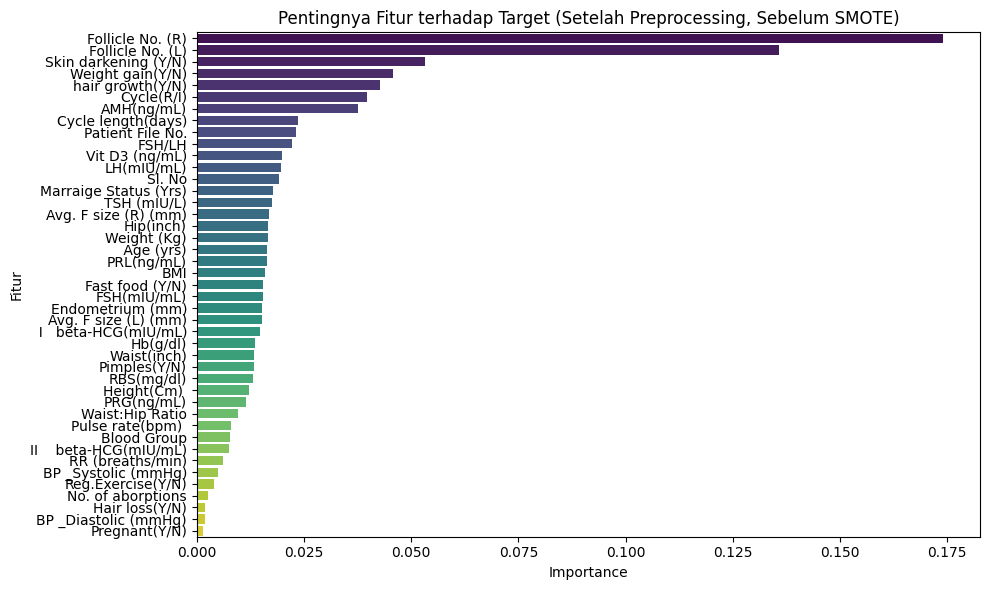

In [48]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=feat_imp_df, palette='viridis')
plt.title("Pentingnya Fitur terhadap Target (Setelah Preprocessing, Sebelum SMOTE)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

### Memilih fitur penting untuk modelling

In [49]:
# Pilih fitur secara manual berdasarkan analisis
selected_features = [
    'Follicle No. (R)',
    'Follicle No. (L)',
    'Skin darkening (Y/N)',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',
    'Cycle(R/I)',
    'AMH(ng/mL)',
    'Cycle length(days)',
    'FSH(mIU/mL)',
    'LH(mIU/mL)'
]

In [50]:
# Filter data hanya dengan fitur yang dipilih
X_train_sel = pd.DataFrame(X_train_imputed, columns=X_train.columns)[selected_features]
X_test_sel = pd.DataFrame(X_test_imputed, columns=X_test.columns)[selected_features]

## MODELLING

### 1. Modelling tanpa SMOTE menggunakan grid **search**

In [51]:
# Mencari max_depth & n_estimators
param_grid_1_nosmote = {
    'max_depth': range(1, 11),         # 1 - 10
    'n_estimators': range(10, 101, 10) # 10 - 100
}

grid_1_nosmote = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_1_nosmote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_1_nosmote.fit(X_train_sel, y_train)

best_max_depth_nosmote = grid_1_nosmote.best_params_['max_depth']
best_n_estimators_nosmote = grid_1_nosmote.best_params_['n_estimators']

print("Tahap 1 - Best Params:", grid_1_nosmote.best_params_)
print("Tahap 1 - Best Accuracy:", grid_1_nosmote.best_score_)

Tahap 1 - Best Params: {'max_depth': 5, 'n_estimators': 20}
Tahap 1 - Best Accuracy: 0.9120556001069232


In [52]:
# Mencari min_samples_leaf
param_grid_2_nosmote = {
    'min_samples_leaf': range(1, 11) # 1 - 10
}

grid_2_nosmote = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth_nosmote,
        n_estimators=best_n_estimators_nosmote
    ),
    param_grid_2_nosmote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_2_nosmote.fit(X_train_sel, y_train)
best_min_samples_leaf_nosmote = grid_2_nosmote.best_params_['min_samples_leaf']

print("Tahap 2 - Best Params:", grid_2_nosmote.best_params_)
print("Tahap 2 - Best Accuracy:", grid_2_nosmote.best_score_)

Tahap 2 - Best Params: {'min_samples_leaf': 1}
Tahap 2 - Best Accuracy: 0.9120556001069232


In [53]:
# Mencari min_samples_split
param_grid_3_nosmote = {
    'min_samples_split': range(2, 11) # 2 - 10
}

grid_3_nosmote = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth_nosmote,
        n_estimators=best_n_estimators_nosmote,
        min_samples_leaf=best_min_samples_leaf_nosmote
    ),
    param_grid_3_nosmote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_3_nosmote.fit(X_train_sel, y_train)
best_min_samples_split_nosmote = grid_3_nosmote.best_params_['min_samples_split']

print("Tahap 3 - Best Params:", grid_3_nosmote.best_params_)
print("Tahap 3 - Best Accuracy:", grid_3_nosmote.best_score_)

Tahap 3 - Best Params: {'min_samples_split': 2}
Tahap 3 - Best Accuracy: 0.9120556001069232


In [54]:
# Final Model tanpa SMOTE
final_model_nosmote = RandomForestClassifier(
    random_state=42,
    max_depth=best_max_depth_nosmote,
    n_estimators=best_n_estimators_nosmote,
    min_samples_leaf=best_min_samples_leaf_nosmote,
    min_samples_split=best_min_samples_split_nosmote
)

final_model_nosmote.fit(X_train_sel, y_train)

# 6. Evaluasi Model
y_pred_nosmote = final_model_nosmote.predict(X_test_sel)

print("\nFinal Model Evaluation (Tanpa SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_nosmote))
print(classification_report(y_test, y_pred_nosmote))


Final Model Evaluation (Tanpa SMOTE):
Accuracy: 0.8899082568807339
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        77
           1       0.86      0.75      0.80        32

    accuracy                           0.89       109
   macro avg       0.88      0.85      0.86       109
weighted avg       0.89      0.89      0.89       109



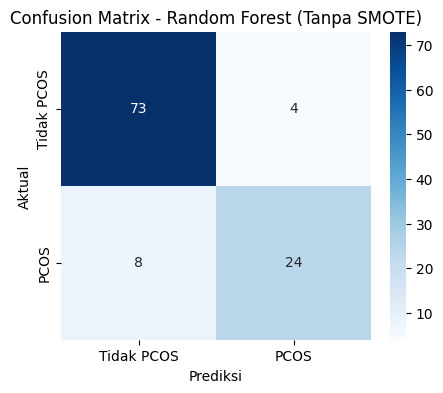

In [55]:
# Confusion Matrix untuk model Non-SMOTE
cm_nosmote = confusion_matrix(y_test, y_pred_nosmote)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nosmote, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Tidak PCOS", "PCOS"],
            yticklabels=["Tidak PCOS", "PCOS"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Random Forest (Tanpa SMOTE)")
plt.show()

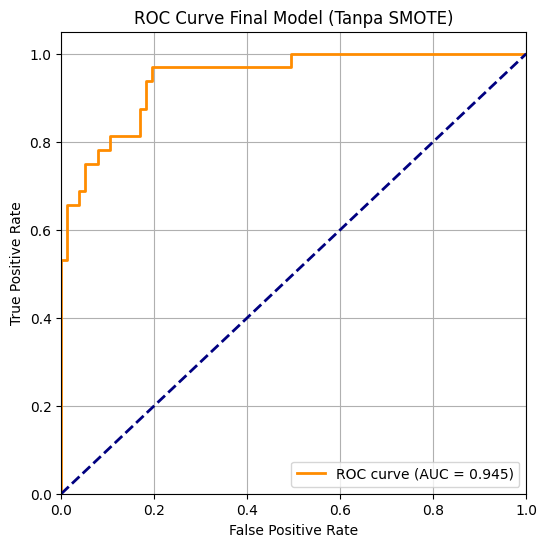

In [56]:
# Prediksi probabilitas class 1
y_pred_proba_nosmote = final_model_nosmote.predict_proba(X_test_sel)[:, 1]

# Hitung FPR, TPR, dan threshold
fpr_nosmote, tpr_nosmote, thresholds_nosmote = roc_curve(y_test, y_pred_proba_nosmote)
roc_auc_nosmote = auc(fpr_nosmote, tpr_nosmote)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_nosmote, tpr_nosmote, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc_nosmote:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Final Model (Tanpa SMOTE)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [57]:
# Print nilai AUC
print(f"AUC (Tanpa SMOTE): {roc_auc_nosmote:.3f}")

AUC (Tanpa SMOTE): 0.945


## SMOTE

In [58]:
# SMOTE pada data train dengan fitur yang dipilih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sel, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Sesudah SMOTE:", y_train_smote.value_counts())

Sebelum SMOTE: PCOS (Y/N)
0    287
1    145
Name: count, dtype: int64
Sesudah SMOTE: PCOS (Y/N)
1    287
0    287
Name: count, dtype: int64


In [59]:
# Menggabungkan hasil SMOTE menjadi DataFrame
df_train_smote = pd.DataFrame(X_train_smote, columns=X_train_sel.columns)
df_train_smote['PCOS (Y/N)'] = y_train_smote.values

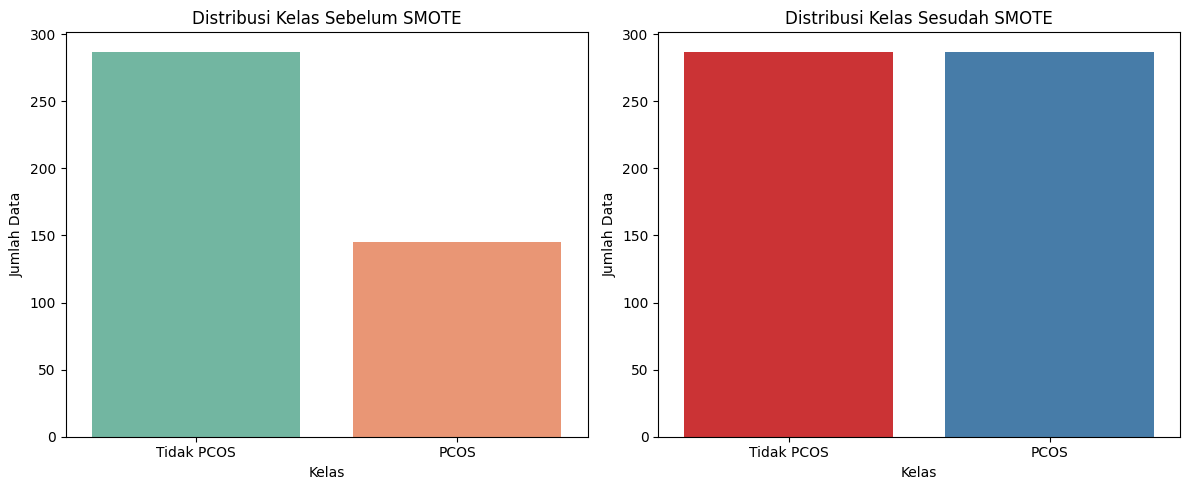

In [60]:
# Plot sebelum SMOTE
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="Set2")
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.xticks([0, 1], ["Tidak PCOS", "PCOS"])

# Plot sesudah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette="Set1")
plt.title("Distribusi Kelas Sesudah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.xticks([0, 1], ["Tidak PCOS", "PCOS"])

plt.tight_layout()
plt.show()

In [61]:
# Simpan ke file CSV
df_train_smote.to_csv('hasil_smote.csv', index=False)
print("Dataset hasil SMOTE berhasil disimpan sebagai 'hasil_smote.csv'")

Dataset hasil SMOTE berhasil disimpan sebagai 'hasil_smote.csv'


### 2. Modelling memakai SMOTE dengan grid search

In [62]:
# Mencari max_depth & n_estimators
param_grid_1 = {
    'max_depth': range(1, 11),         # 1 - 10
    'n_estimators': range(10, 101, 10) # 10 - 100 (kelipatan 10)
}

grid_1 = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_1.fit(X_train_smote, y_train_smote)

print("Tahap 1 - Best Params:", grid_1.best_params_)
print("Tahap 1 - Best Accuracy:", grid_1.best_score_)

best_max_depth = grid_1.best_params_['max_depth']
best_n_estimators = grid_1.best_params_['n_estimators']

Tahap 1 - Best Params: {'max_depth': 9, 'n_estimators': 30}
Tahap 1 - Best Accuracy: 0.9268649885583524


In [63]:
# Mencari min_samples_leaf
param_grid_2 = {
    'min_samples_leaf': range(1, 11) # 1 - 10
}

grid_2 = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth,
        n_estimators=best_n_estimators
    ),
    param_grid_2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_2.fit(X_train_smote, y_train_smote)

print("Tahap 2 - Best Params:", grid_2.best_params_)
print("Tahap 2 - Best Accuracy:", grid_2.best_score_)

best_min_samples_leaf = grid_2.best_params_['min_samples_leaf']

Tahap 2 - Best Params: {'min_samples_leaf': 1}
Tahap 2 - Best Accuracy: 0.9268649885583524


In [64]:
# Mencari min_samples_split
param_grid_3 = {
    'min_samples_split': range(2, 11) # 2 - 10
}

grid_3 = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth,
        n_estimators=best_n_estimators,
        min_samples_leaf=best_min_samples_leaf
    ),
    param_grid_3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_3.fit(X_train_smote, y_train_smote)

print("Tahap 3 - Best Params:", grid_3.best_params_)
print("Tahap 3 - Best Accuracy:", grid_3.best_score_)

best_min_samples_split = grid_3.best_params_['min_samples_split']

Tahap 3 - Best Params: {'min_samples_split': 2}
Tahap 3 - Best Accuracy: 0.9268649885583524


In [65]:
# Final Model dengan semua best params
final_model = RandomForestClassifier(
    random_state=42,
    max_depth=best_max_depth,
    n_estimators=best_n_estimators,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split
)

final_model.fit(X_train_smote, y_train_smote)
y_pred = final_model.predict(X_test_sel)

print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Final Model Evaluation:
Accuracy: 0.8899082568807339
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.83      0.78      0.81        32

    accuracy                           0.89       109
   macro avg       0.87      0.86      0.86       109
weighted avg       0.89      0.89      0.89       109



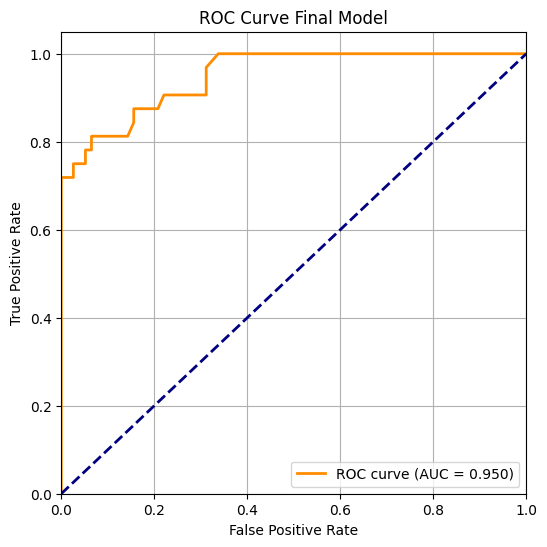

In [66]:
# Prediksi probabilitas untuk ROC Curve
y_pred_proba = final_model.predict_proba(X_test_sel)[:, 1]  # mengambil probabilitas class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Final Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


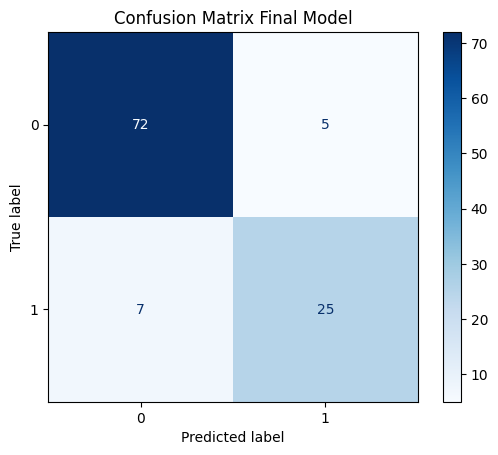

In [67]:
# Confusion Matrix
y_pred = final_model.predict(X_test_sel)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Final Model")
plt.show()


In [68]:
# Print nilai AUC
print(f"AUC: {roc_auc:.3f}")

AUC: 0.950


## PREDIKSI MANUAL

In [69]:
# Daftar fitur dipilih
selected_features = [
    'Follicle No. (R)',
    'Follicle No. (L)',
    'Skin darkening (Y/N)',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',
    'Cycle(R/I)',
    'AMH(ng/mL)',
    'Cycle length(days)',
    'FSH(mIU/mL)',
    'LH(mIU/mL)'
]

# Input manual dari pengguna
print("=== Prediksi PCOS Berdasarkan 10 Fitur Penting ===")
input_data = []
for feature in selected_features:
    value = input(f"Masukkan nilai untuk '{feature}': ")
    try:
        value = float(value)
    except:
        print("⚠️ Nilai tidak valid, gunakan angka. Default = 0")
        value = 0
    input_data.append(value)

# Buat DataFrame satu baris
input_df = pd.DataFrame([input_data], columns=selected_features)

# Prediksi
prediction = final_model.predict(input_df)[0]
probability = final_model.predict_proba(input_df)[0][1]  # probabilitas PCOS

# Tampilkan hasil
if prediction == 1:
    print(f"\n💡 Hasil Prediksi: **PCOS** dengan probabilitas {probability:.2%}")
else:
    print(f"\n💡 Hasil Prediksi: **Tidak PCOS** dengan probabilitas {probability:.2%}")


=== Prediksi PCOS Berdasarkan 10 Fitur Penting ===
Masukkan nilai untuk 'Follicle No. (R)': 15
Masukkan nilai untuk 'Follicle No. (L)': 13
Masukkan nilai untuk 'Skin darkening (Y/N)': 0
Masukkan nilai untuk 'Weight gain(Y/N)': 0
Masukkan nilai untuk 'hair growth(Y/N)': 0
Masukkan nilai untuk 'Cycle(R/I)': 2
Masukkan nilai untuk 'AMH(ng/mL)': 6.6
Masukkan nilai untuk 'Cycle length(days)': 5
Masukkan nilai untuk 'FSH(mIU/mL)': 6.2
Masukkan nilai untuk 'LH(mIU/mL)': 0.88

💡 Hasil Prediksi: **PCOS** dengan probabilitas 83.33%


## Menyimpan Model

In [71]:
import joblib

# Gabungkan model + fitur jadi 1 dictionary
bundle = {
    "model": final_model,
    "features": selected_features
}

# Simpan ke file .sav
joblib.dump(bundle, "final_model_with_features.sav")

print("Model + fitur penting berhasil disimpan!")


Model + fitur penting berhasil disimpan!
